In [1]:
# Load the packages

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Get data from table

In [2]:
# fbref table link
RM = 'https://fbref.com/en/squads/53a2f082/2023-2024/matchlogs/c12/schedule/Real-Madrid-Scores-and-Fixtures-La-Liga'

In [3]:
# convert html table to pandas dataframe
RM = pd.read_html(RM)
RM = RM[0]  

In [4]:
RM.head()

,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,2023-08-12,21:30,Matchweek 1,Sat,Away,W,2.0,0.0,Athletic Club,0.9,0.4,54.0,48927.0,Dani Carvajal,4-1-2-1-2◆,Jesús Gil,Match Report,NaN
1,2023-08-19,19:30,Matchweek 2,Sat,Away,W,3.0,1.0,Almería,2.0,1.3,57.0,17561.0,Dani Carvajal,4-3-1-2,José Sánchez,Match Report,NaN
2,2023-08-25,21:30,Matchweek 3,Fri,Away,W,1.0,0.0,Celta Vigo,1.4,1.2,63.0,23057.0,Dani Carvajal,4-1-2-1-2◆,Isidro Díaz de Mera,Match Report,NaN
3,2023-09-02,16:15,Matchweek 4,Sat,Home,W,2.0,1.0,Getafe,2.8,0.4,76.0,66747.0,Luka Modrić,4-3-1-2,Mario Melero,Match Report,NaN
4,2023-09-17,21:00,Matchweek 5,Sun,Home,W,2.0,1.0,Real Sociedad,2.0,1.6,52.0,70092.0,Dani Carvajal,4-1-2-1-2◆,César Soto,Match Report,NaN


# choose metrics

In [5]:
RM = RM[['Date','Round','Venue','Opponent' ,'Result', 'GF', 'GA', 'xG', 'xGA']]
# romove from matchweek 19
RM = RM.iloc[0:19]
RM

,Date,Round,Venue,Opponent,Result,GF,GA,xG,xGA
0,2023-08-12,Matchweek 1,Away,Athletic Club,W,2.0,0.0,0.9,0.4
1,2023-08-19,Matchweek 2,Away,Almería,W,3.0,1.0,2.0,1.3
2,2023-08-25,Matchweek 3,Away,Celta Vigo,W,1.0,0.0,1.4,1.2
3,2023-09-02,Matchweek 4,Home,Getafe,W,2.0,1.0,2.8,0.4
4,2023-09-17,Matchweek 5,Home,Real Sociedad,W,2.0,1.0,2.0,1.6
5,2023-09-24,Matchweek 6,Away,Atlético Madrid,L,1.0,3.0,1.0,1.4
6,2023-09-27,Matchweek 7,Home,Las Palmas,W,2.0,0.0,1.7,0.7
7,2023-09-30,Matchweek 8,Away,Girona,W,3.0,0.0,2.3,1.6
8,2023-10-07,Matchweek 9,Home,Osasuna,W,4.0,0.0,3.2,0.5
9,2023-10-21,Matchweek 10,Away,Sevilla,D,1.0,1.0,1.6,1.5


In [6]:
RM = RM[['xG', 'xGA']]
RM

,xG,xGA
0,0.9,0.4
1,2.0,1.3
2,1.4,1.2
3,2.8,0.4
4,2.0,1.6
5,1.0,1.4
6,1.7,0.7
7,2.3,1.6
8,3.2,0.5
9,1.6,1.5


# round xG

In [7]:
# round the values
RM = RM.round(0)
RM

,xG,xGA
0,1.0,0.0
1,2.0,1.0
2,1.0,1.0
3,3.0,0.0
4,2.0,2.0
5,1.0,1.0
6,2.0,1.0
7,2.0,2.0
8,3.0,0.0
9,2.0,2.0


In [8]:
# create a new column with Team name
RM['Team'] = 'Real Madrid'

In [9]:
# create new column points
# 3 points xG > xGA
# 1 point xG = xGA
# 0 points xG < xGA
RM['XPoints'] = np.where(RM['xG'] > RM['xGA'], 3, np.where(RM['xG'] == RM['xGA'], 1, 0))
RM


,xG,xGA,Team,XPoints
0,1.0,0.0,Real Madrid,3
1,2.0,1.0,Real Madrid,3
2,1.0,1.0,Real Madrid,1
3,3.0,0.0,Real Madrid,3
4,2.0,2.0,Real Madrid,1
5,1.0,1.0,Real Madrid,1
6,2.0,1.0,Real Madrid,3
7,2.0,2.0,Real Madrid,1
8,3.0,0.0,Real Madrid,3
9,2.0,2.0,Real Madrid,1


In [10]:
# create a new columns Wins, Draws, Losses
RM['Wins'] = np.where(RM['xG'] > RM['xGA'], 1, 0)
RM['Draws'] = np.where(RM['xG'] == RM['xGA'], 1, 0)
RM['Losses'] = np.where(RM['xG'] < RM['xGA'], 1, 0)
RM


,xG,xGA,Team,XPoints,Wins,Draws,Losses
0,1.0,0.0,Real Madrid,3,1,0,0
1,2.0,1.0,Real Madrid,3,1,0,0
2,1.0,1.0,Real Madrid,1,0,1,0
3,3.0,0.0,Real Madrid,3,1,0,0
4,2.0,2.0,Real Madrid,1,0,1,0
5,1.0,1.0,Real Madrid,1,0,1,0
6,2.0,1.0,Real Madrid,3,1,0,0
7,2.0,2.0,Real Madrid,1,0,1,0
8,3.0,0.0,Real Madrid,3,1,0,0
9,2.0,2.0,Real Madrid,1,0,1,0


In [11]:
# sum the points, goals for, goals against, wins, draws, losses
RM = RM.groupby('Team').agg({'XPoints': 'sum', 'xG': 'sum', 'xGA': 'sum', 'Wins': 'sum', 'Draws': 'sum', 'Losses': 'sum'}).reset_index()
RM

,Team,XPoints,xG,xGA,Wins,Draws,Losses
0,Real Madrid,38,34.0,19.0,10,8,1


# Scrape all teams

In [12]:
import pandas as pd
import numpy as np
import re
import time

# List of URLs of team pages
team_urls = [
    'https://fbref.com/en/squads/53a2f082/2023-2024/matchlogs/c12/schedule/Real-Madrid-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/9024a00a/2023-2024/matchlogs/c12/schedule/Girona-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/206d90db/2023-2024/matchlogs/c12/schedule/Barcelona-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/db3b9613/2023-2024/matchlogs/c12/schedule/Atletico-Madrid-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/2b390eca/2023-2024/matchlogs/c12/schedule/Athletic-Club-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/fc536746/2023-2024/matchlogs/c12/schedule/Real-Betis-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/e31d1cd9/2023-2024/matchlogs/c12/schedule/Real-Sociedad-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/dcc91a7b/2023-2024/matchlogs/c12/schedule/Valencia-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/0049d422/2023-2024/matchlogs/c12/schedule/Las-Palmas-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/7848bd64/2023-2024/matchlogs/c12/schedule/Getafe-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/03c57e2b/2023-2024/matchlogs/c12/schedule/Osasuna-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/8d6fd021/2023-2024/matchlogs/c12/schedule/Alaves-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/2a8183b3/2023-2024/matchlogs/c12/schedule/Villarreal-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/ad2be733/2023-2024/matchlogs/c12/schedule/Sevilla-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/98e8af82/2023-2024/matchlogs/c12/schedule/Rayo-Vallecano-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/2aa12281/2023-2024/matchlogs/c12/schedule/Mallorca-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/f25da7fb/2023-2024/matchlogs/c12/schedule/Celta-Vigo-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/ee7c297c/2023-2024/matchlogs/c12/schedule/Cadiz-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/a0435291/2023-2024/matchlogs/c12/schedule/Granada-Scores-and-Fixtures-La-Liga',
    'https://fbref.com/en/squads/78ecf4bb/2023-2024/matchlogs/c12/schedule/Almeria-Scores-and-Fixtures-La-Liga',
    # Add URLs for other teams here
]

# Initialize an empty list to store team data
team_data = []

# Iterate over each team URL
for url in team_urls:
    # Extract team name from URL
    team_name = re.search(r'/([^/]+)-Scores-and-Fixtures', url).group(1)
    
    # Convert html table to pandas dataframe
    team_df = pd.read_html(url)
    team_df = team_df[0]

    # Clean and process the data as needed
    team_df = team_df[['Date', 'Round', 'Venue', 'Opponent', 'Result', 'GF', 'GA', 'xG', 'xGA']]
    team_df = team_df.iloc[0:19]
    team_df = team_df[['xG', 'xGA']]
    team_df = team_df.round(0)
    
    team_df['Wins'] = np.where(team_df['xG'] > team_df['xGA'], 1, 0)
    team_df['Draws'] = np.where(team_df['xG'] == team_df['xGA'], 1, 0)
    team_df['Losses'] = np.where(team_df['xG'] < team_df['xGA'], 1, 0)
    
    team_df['XPoints'] = np.where(team_df['xG'] > team_df['xGA'], 3, np.where(team_df['xG'] == team_df['xGA'], 1, 0))
    team_df['Team'] = team_name  # Add the team name as a column
    team_df = team_df.groupby('Team').agg({'XPoints': 'sum', 'Wins': 'sum', 'Draws': 'sum', 'Losses': 'sum', 'xG': 'sum', 'xGA': 'sum'}).reset_index()

    # Append the processed data to the list
    team_data.append(team_df)

    time.sleep(5)
    
# Combine data for all teams into a single DataFrame
final_df = pd.concat(team_data)

# Reset index
final_df.reset_index(drop=True, inplace=True)

# Display the final DataFrame
print(final_df)



               Team  XPoints  Wins  Draws  Losses    xG   xGA
0       Real-Madrid       38    10      8       1  34.0  19.0
1            Girona       35     9      8       2  36.0  29.0
2         Barcelona       47    14      5       0  42.0  22.0
3   Atletico-Madrid       40    12      4       3  32.0  21.0
4     Athletic-Club       41    12      5       2  35.0  15.0
5        Real-Betis       24     6      6       7  22.0  26.0
6     Real-Sociedad       25     5     10       4  24.0  22.0
7          Valencia       22     5      7       7  20.0  22.0
8        Las-Palmas       15     3      6      10  16.0  27.0
9            Getafe       23     6      5       8  20.0  26.0
10          Osasuna       21     6      3      10  20.0  26.0
11           Alaves       22     5      7       7  24.0  24.0
12       Villarreal       19     4      7       8  26.0  34.0
13          Sevilla       18     3      9       7  22.0  26.0
14   Rayo-Vallecano       24     6      6       7  23.0  25.0
15      

In [13]:
final_df

,Team,XPoints,Wins,Draws,Losses,xG,xGA
0,Real-Madrid,38,10,8,1,34.0,19.0
1,Girona,35,9,8,2,36.0,29.0
2,Barcelona,47,14,5,0,42.0,22.0
3,Atletico-Madrid,40,12,4,3,32.0,21.0
4,Athletic-Club,41,12,5,2,35.0,15.0
5,Real-Betis,24,6,6,7,22.0,26.0
6,Real-Sociedad,25,5,10,4,24.0,22.0
7,Valencia,22,5,7,7,20.0,22.0
8,Las-Palmas,15,3,6,10,16.0,27.0
9,Getafe,23,6,5,8,20.0,26.0


In [14]:
# rename 
final_df['Team'] = final_df['Team'].replace({'Real-Madrid':'Real Madrid',
                                         'Girona':'Girona FC',
                                         'Barcelona':'FC Barcelona',
                                         'Atletico-Madrid':'Atl Madrid',
                                         'Athletic-Club':'Ath Bilbao',
                                         'Real-Betis':'Real Betis',
                                         'Real-Sociedad':'Real Sociedad',
                                         'Valencia':'Valencia CF',
                                         'Las-Palmas':'UD Las Palmas',
                                         'Getafe':'Getafe CF',
                                         'Osasuna':'CA Osasuna',
                                         'Alaves':'Deportivo Alavés',
                                         'Villarreal':'Villarreal CF',
                                         'Sevilla':'Sevilla FC',
                                         'Rayo-Vallecano':'Rayo Vallecano',
                                         'Mallorca':'RCD Mallorca',
                                         'Celta-Vigo':'RC Celta',
                                         'Cadiz':'Cadiz CF',
                                         'Granada':'Granada CF',
                                         'Almeria':'UD Almeria'})
final_df

,Team,XPoints,Wins,Draws,Losses,xG,xGA
0,Real Madrid,38,10,8,1,34.0,19.0
1,Girona FC,35,9,8,2,36.0,29.0
2,FC Barcelona,47,14,5,0,42.0,22.0
3,Atl Madrid,40,12,4,3,32.0,21.0
4,Ath Bilbao,41,12,5,2,35.0,15.0
5,Real Betis,24,6,6,7,22.0,26.0
6,Real Sociedad,25,5,10,4,24.0,22.0
7,Valencia CF,22,5,7,7,20.0,22.0
8,UD Las Palmas,15,3,6,10,16.0,27.0
9,Getafe CF,23,6,5,8,20.0,26.0


In [15]:
LaLiga_xG_xP = final_df
LaLiga_xG_xP

,Team,XPoints,Wins,Draws,Losses,xG,xGA
0,Real Madrid,38,10,8,1,34.0,19.0
1,Girona FC,35,9,8,2,36.0,29.0
2,FC Barcelona,47,14,5,0,42.0,22.0
3,Atl Madrid,40,12,4,3,32.0,21.0
4,Ath Bilbao,41,12,5,2,35.0,15.0
5,Real Betis,24,6,6,7,22.0,26.0
6,Real Sociedad,25,5,10,4,24.0,22.0
7,Valencia CF,22,5,7,7,20.0,22.0
8,UD Las Palmas,15,3,6,10,16.0,27.0
9,Getafe CF,23,6,5,8,20.0,26.0


In [16]:
# order by xPoints
LaLiga_xG_xP = LaLiga_xG_xP.sort_values(by='XPoints', ascending=False)
LaLiga_xG_xP

,Team,XPoints,Wins,Draws,Losses,xG,xGA
2,FC Barcelona,47,14,5,0,42.0,22.0
4,Ath Bilbao,41,12,5,2,35.0,15.0
3,Atl Madrid,40,12,4,3,32.0,21.0
0,Real Madrid,38,10,8,1,34.0,19.0
1,Girona FC,35,9,8,2,36.0,29.0
15,RCD Mallorca,26,8,2,9,23.0,23.0
6,Real Sociedad,25,5,10,4,24.0,22.0
14,Rayo Vallecano,24,6,6,7,23.0,25.0
5,Real Betis,24,6,6,7,22.0,26.0
16,RC Celta,24,6,6,7,27.0,28.0


In [17]:
# add points percentage 
LaLiga_xG_xP['xP_percentage'] = LaLiga_xG_xP['XPoints'] / 57

# winning percentage
LaLiga_xG_xP['xG_W_percentage'] = LaLiga_xG_xP['Wins'] / 19

# winning draw percentage
LaLiga_xG_xP['xG_WD_percentage'] = (LaLiga_xG_xP['Wins'] + LaLiga_xG_xP['Draws']) / 19

# loss percentage
LaLiga_xG_xP['xG_L_percentage'] = LaLiga_xG_xP['Losses'] / 19

# add column of pythagorean expectation
LaLiga_xG_xP['x_pyth'] = LaLiga_xG_xP['xG']**2 / (LaLiga_xG_xP['xG']**2 + LaLiga_xG_xP['xGA']**2)
LaLiga_xG_xP

,Team,XPoints,Wins,Draws,Losses,xG,xGA,xP_percentage,xG_W_percentage,xG_WD_percentage,xG_L_percentage,x_pyth
2,FC Barcelona,47,14,5,0,42.0,22.0,0.824561,0.736842,1.000000,0.000000,0.784698
4,Ath Bilbao,41,12,5,2,35.0,15.0,0.719298,0.631579,0.894737,0.105263,0.844828
3,Atl Madrid,40,12,4,3,32.0,21.0,0.701754,0.631579,0.842105,0.157895,0.698976
0,Real Madrid,38,10,8,1,34.0,19.0,0.666667,0.526316,0.947368,0.052632,0.762030
1,Girona FC,35,9,8,2,36.0,29.0,0.614035,0.473684,0.894737,0.105263,0.606458
15,RCD Mallorca,26,8,2,9,23.0,23.0,0.456140,0.421053,0.526316,0.473684,0.500000
6,Real Sociedad,25,5,10,4,24.0,22.0,0.438596,0.263158,0.789474,0.210526,0.543396
14,Rayo Vallecano,24,6,6,7,23.0,25.0,0.421053,0.315789,0.631579,0.368421,0.458406
5,Real Betis,24,6,6,7,22.0,26.0,0.421053,0.315789,0.631579,0.368421,0.417241
16,RC Celta,24,6,6,7,27.0,28.0,0.421053,0.315789,0.631579,0.368421,0.481824


In [18]:
# stastbomb Formula
points_per_game  = (3 * LaLiga_xG_xP['Wins'] + LaLiga_xG_xP['Draws']) / 19
LaLiga_xG_xP['xSB_expected_points'] = points_per_game**2 / (points_per_game**2 + (3 - points_per_game)**2)

# Hofnmann formula
LaLiga_xG_xP['xHof_expected_points'] = (LaLiga_xG_xP['xG']**2) / (LaLiga_xG_xP['xG']**2 + LaLiga_xG_xP['xGA']**2 + LaLiga_xG_xP['Draws'])


LaLiga_xG_xP

,Team,XPoints,Wins,Draws,Losses,xG,xGA,xP_percentage,xG_W_percentage,xG_WD_percentage,xG_L_percentage,x_pyth,xSB_expected_points,xHof_expected_points
2,FC Barcelona,47,14,5,0,42.0,22.0,0.824561,0.736842,1.000000,0.000000,0.784698,0.956691,0.782956
4,Ath Bilbao,41,12,5,2,35.0,15.0,0.719298,0.631579,0.894737,0.105263,0.844828,0.867837,0.841924
3,Atl Madrid,40,12,4,3,32.0,21.0,0.701754,0.631579,0.842105,0.157895,0.698976,0.847009,0.697073
0,Real Madrid,38,10,8,1,34.0,19.0,0.666667,0.526316,0.947368,0.052632,0.762030,0.800000,0.758033
1,Girona FC,35,9,8,2,36.0,29.0,0.614035,0.473684,0.894737,0.105263,0.606458,0.716793,0.604196
15,RCD Mallorca,26,8,2,9,23.0,23.0,0.456140,0.421053,0.526316,0.473684,0.500000,0.412951,0.499057
6,Real Sociedad,25,5,10,4,24.0,22.0,0.438596,0.263158,0.789474,0.210526,0.543396,0.379018,0.538318
14,Rayo Vallecano,24,6,6,7,23.0,25.0,0.421053,0.315789,0.631579,0.368421,0.458406,0.345946,0.456034
5,Real Betis,24,6,6,7,22.0,26.0,0.421053,0.315789,0.631579,0.368421,0.417241,0.345946,0.415094
16,RC Celta,24,6,6,7,27.0,28.0,0.421053,0.315789,0.631579,0.368421,0.481824,0.345946,0.479921


In [19]:
# pearson correlation for xP_percentage	xG_W_percentage	xG_WD_percentage	xG_L_percentage	x_pyth	xSB_expected_points	xHof_expected_points omly
LaLiga_xG_xP[['XPoints','xP_percentage', 'xG_W_percentage', 'xG_WD_percentage', 'xG_L_percentage', 'x_pyth', 'xSB_expected_points', 'xHof_expected_points']].corr()

,XPoints,xP_percentage,xG_W_percentage,xG_WD_percentage,xG_L_percentage,x_pyth,xSB_expected_points,xHof_expected_points
XPoints,1.000000,1.000000,0.968506,0.899981,-0.899981,0.944905,0.996001,0.946101
xP_percentage,1.000000,1.000000,0.968506,0.899981,-0.899981,0.944905,0.996001,0.946101
xG_W_percentage,0.968506,0.968506,1.000000,0.763095,-0.763095,0.871456,0.961593,0.873926
xG_WD_percentage,0.899981,0.899981,0.763095,1.000000,-1.000000,0.926889,0.901703,0.925669
xG_L_percentage,-0.899981,-0.899981,-0.763095,-1.000000,1.000000,-0.926889,-0.901703,-0.925669
x_pyth,0.944905,0.944905,0.871456,0.926889,-0.926889,1.000000,0.949018,0.999981
xSB_expected_points,0.996001,0.996001,0.961593,0.901703,-0.901703,0.949018,1.000000,0.950171
xHof_expected_points,0.946101,0.946101,0.873926,0.925669,-0.925669,0.999981,0.950171,1.000000


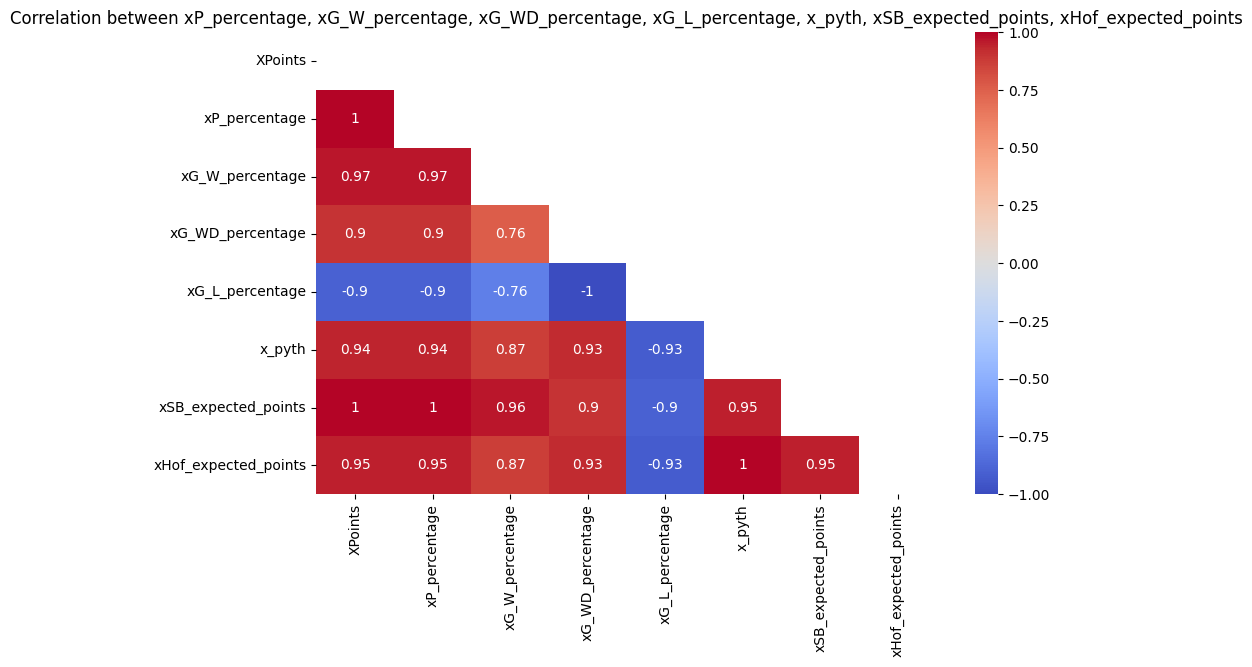

In [20]:
# plot the correlation with upper triangle mask
mask = np.triu(LaLiga_xG_xP[['XPoints','xP_percentage', 'xG_W_percentage', 'xG_WD_percentage', 'xG_L_percentage', 'x_pyth', 'xSB_expected_points', 'xHof_expected_points']].corr())
plt.figure(figsize=(10, 6))
sns.heatmap(LaLiga_xG_xP[['XPoints','xP_percentage', 'xG_W_percentage', 'xG_WD_percentage', 'xG_L_percentage', 'x_pyth', 'xSB_expected_points', 'xHof_expected_points']].corr(), annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation between xP_percentage, xG_W_percentage, xG_WD_percentage, xG_L_percentage, x_pyth, xSB_expected_points, xHof_expected_points')
plt.show()

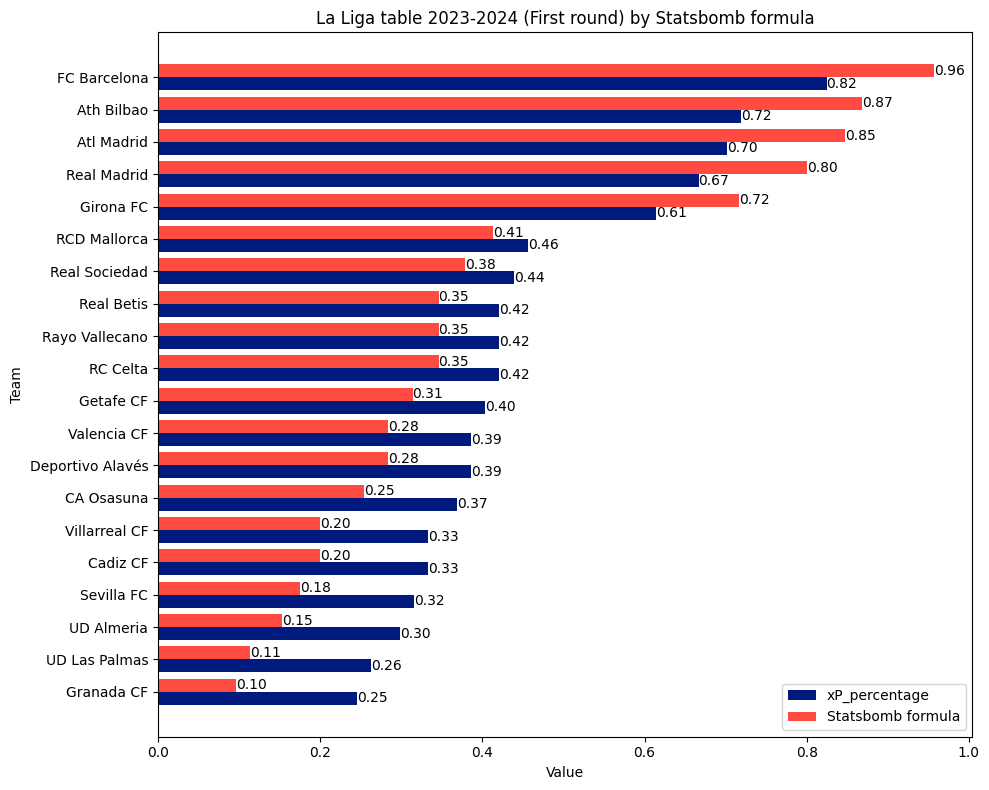

In [21]:
LaLiga_xG_xP = LaLiga_xG_xP.sort_values(by='xSB_expected_points', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
bar_height = 0.40
index = range(len(LaLiga_xG_xP))

plt.xlabel('Value')
plt.ylabel('Team')
plt.title('La Liga table 2023-2024 (First round) by Statsbomb formula')

# Annotate bars with values
bars1 = plt.barh(index, LaLiga_xG_xP['xP_percentage'], bar_height, label='xP_percentage', color='#001A7D')
bars2 = plt.barh([i + bar_height for i in index], LaLiga_xG_xP['xSB_expected_points'], bar_height, label='Statsbomb formula', color='#ff4b42')

for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left')

plt.yticks([i + bar_height / 2 for i in index], LaLiga_xG_xP['Team'])
plt.legend()

plt.grid(False) 

plt.tight_layout()
plt.show()

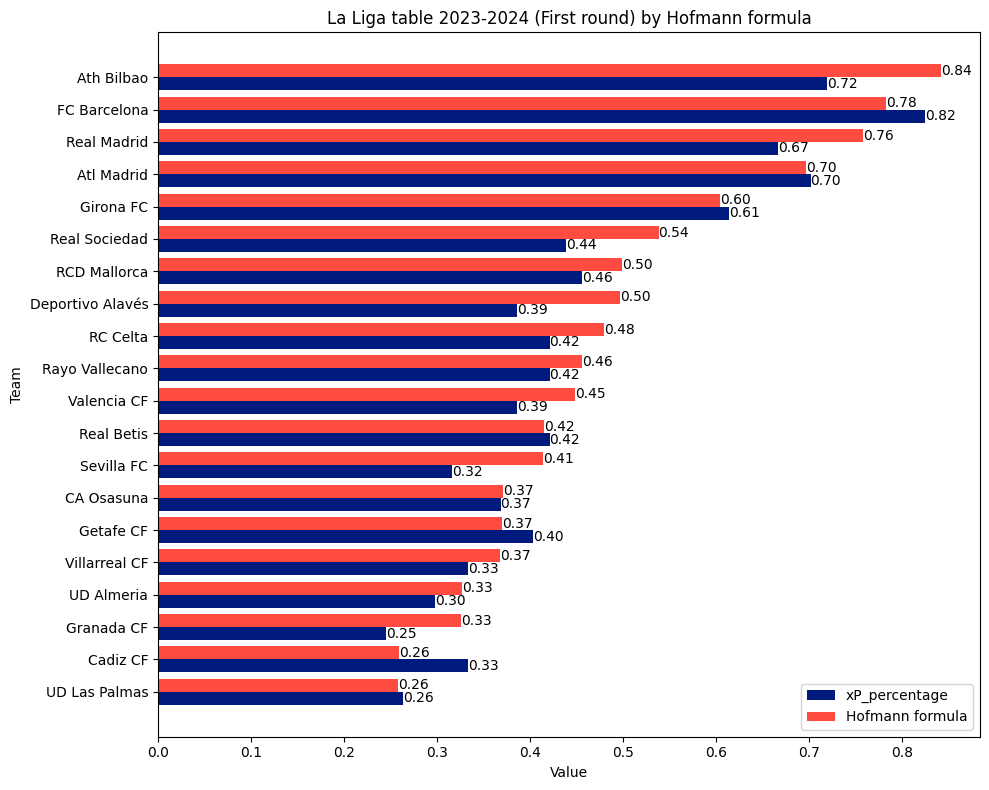

In [23]:
LaLiga_xG_xP = LaLiga_xG_xP.sort_values(by='xHof_expected_points', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
bar_height = 0.40
index = range(len(LaLiga_xG_xP))

plt.xlabel('Value')
plt.ylabel('Team')
plt.title('La Liga table 2023-2024 (First round) by Hofmann formula')

# Annotate bars with values
bars1 = plt.barh(index, LaLiga_xG_xP['xP_percentage'], bar_height, label='xP_percentage', color='#001A7D')
bars2 = plt.barh([i + bar_height for i in index], LaLiga_xG_xP['xHof_expected_points'], bar_height, label='Hofmann formula', color='#ff4b42')

for bars in [bars1, bars2]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left')

plt.yticks([i + bar_height / 2 for i in index], LaLiga_xG_xP['Team'])
plt.legend()

plt.grid(False) 

plt.tight_layout()
plt.show()

Team	XPoints	Wins	Draws	Losses	xG	xGA	xP_percentage	xG_W_percentage	xG_WD_percentage	xG_L_percentage	x_pyth	xSB_expected_points	xHof_expected_points

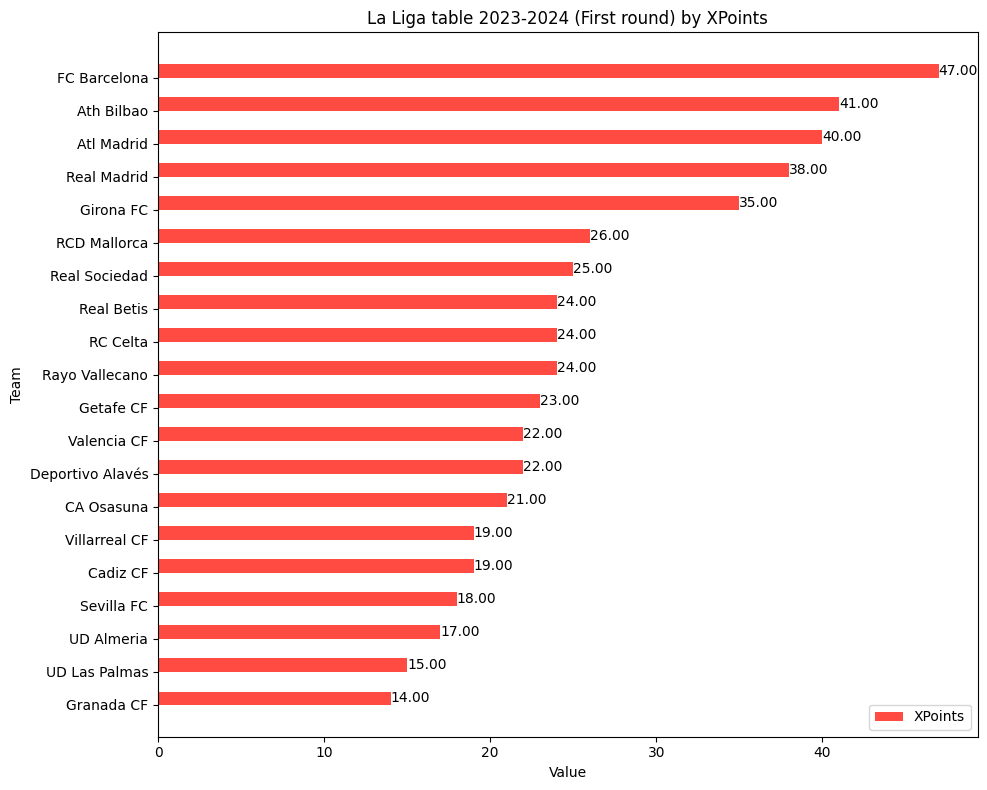

In [27]:
LaLiga_xG_xP = LaLiga_xG_xP.sort_values(by='XPoints', ascending=True)

# Plotting
plt.figure(figsize=(10, 8))
bar_height = 0.40
index = range(len(LaLiga_xG_xP))

plt.xlabel('Value')
plt.ylabel('Team')
plt.title('La Liga table 2023-2024 (First round) by XPoints')

# Annotate bars with values
bars2 = plt.barh([i + bar_height for i in index], LaLiga_xG_xP['XPoints'], bar_height, label='XPoints', color='#ff4b42')

for bars in [bars2]:
    for bar in bars:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
                 va='center', ha='left')

plt.yticks([i + bar_height / 2 for i in index], LaLiga_xG_xP['Team'])
plt.legend()

plt.grid(False) 

plt.tight_layout()
plt.show()